In [1]:
import csv
import os
import numpy as np
import h5py
import skimage.io
import torch

ck_path = '/kaggle/input/driver2x/nic'
#ck+dataset whaving 7 emotions categorized into seven folders

anger_path = os.path.join(ck_path, 'AN')
disgust_path = os.path.join(ck_path, 'DI')
fear_path = os.path.join(ck_path, 'FE')
happy_path = os.path.join(ck_path, 'HA')
sadness_path = os.path.join(ck_path, 'SA')
surprise_path = os.path.join(ck_path, 'SU')
#contempt_path = os.path.join(ck_path, 'contempt')


# # Creat the list to store the data and label information
data_x = []
data_y = []

datapath = os.path.join('KMUdata','mtcnnkmuneww.h5')
if not os.path.exists(os.path.dirname(datapath)):
    os.makedirs(os.path.dirname(datapath))

# order the file, so the training set will not contain the test set (don't random)
files = os.listdir(anger_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(anger_path,filename))
    data_x.append(I.tolist())
    data_y.append(0)

files = os.listdir(disgust_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(disgust_path,filename))
    data_x.append(I.tolist())
    data_y.append(1)

files = os.listdir(fear_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(fear_path,filename))
    data_x.append(I.tolist())
    data_y.append(2)

files = os.listdir(happy_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(happy_path,filename))
    data_x.append(I.tolist())
    data_y.append(3)

files = os.listdir(sadness_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(sadness_path,filename))
    data_x.append(I.tolist())
    data_y.append(4)

files = os.listdir(surprise_path)
files.sort()
for filename in files:
    I = skimage.io.imread(os.path.join(surprise_path,filename))
    data_x.append(I.tolist())
    data_y.append(5)

print(np.shape(data_x))
print(np.shape(data_y))

datafile = h5py.File(datapath, 'w')
datafile.create_dataset("data_pixel", dtype = 'uint8', data=data_x)
datafile.create_dataset("data_label", dtype = 'int64', data=data_y)
datafile.close()

print("Save data finish!!!")

(949, 112, 112)
(949,)
Save data finish!!!


Mean of the generated data: 4.94


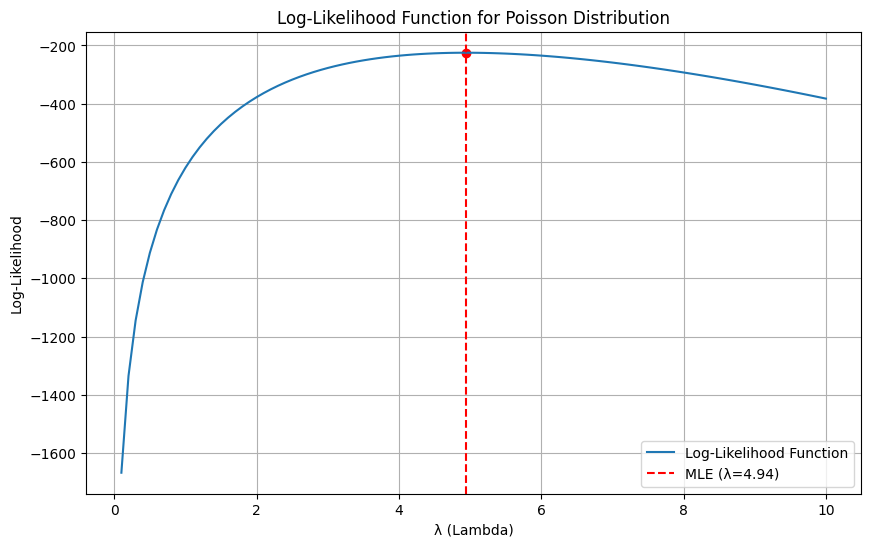

In [5]:
### Example 1 Poisson's Distribution

# Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize

# Generate Poisson distributed data points
np.random.seed(42)  # for reproducibility
lambda_true = 5
data = np.random.poisson(lambda_true, 100)

# Define the log-likelihood function for Poisson distribution
def poisson_log_likelihood(lambda_estimated, data):
    # Calculate the log-likelihood: sum(x * log(lambda) - lambda - log(x!))
    log_likelihood = np.sum(data * np.log(lambda_estimated) - lambda_estimated - np.log([math.factorial(x) for x in data]))
    return log_likelihood

# Maximum Likelihood Estimation (MLE) for Poisson distribution
mle_result = minimize(lambda params: -poisson_log_likelihood(params[0], data), x0=[1])
lambda_mle = mle_result.x[0]

lambda_mle # This is the best value of parameter calculated through MLE

data_mean = np.mean(data)
print("Mean of the generated data:", data_mean)
# As for the poison's distribution the the best value of lambda comes out to be mean hence prooved.

# Calculate log-likelihood for a range of lambda values
lambda_values = np.linspace(0.1, 10, 100)
log_likelihood_values = [poisson_log_likelihood(l, data) for l in lambda_values]

# Plotting the log-likelihood function
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, log_likelihood_values, label='Log-Likelihood Function')
plt.axvline(lambda_mle, color='r', linestyle='--', label=f'MLE (λ={lambda_mle:.2f})')
plt.scatter([lambda_mle], [poisson_log_likelihood(lambda_mle, data)], color='red')

plt.title('Log-Likelihood Function for Poisson Distribution')
plt.xlabel('λ (Lambda)')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()
# It's clear that the maximum liklihood is acheived at lambda that is estimated by MLE , 
# so this lambda is best choice to represnet our poisson's distribution curve.

Groups  FLOPs       MAC         
------------------------------
1       51380224    610304      
2       25690112    606208      
4       12845056    604160      
8       6422528     603136      


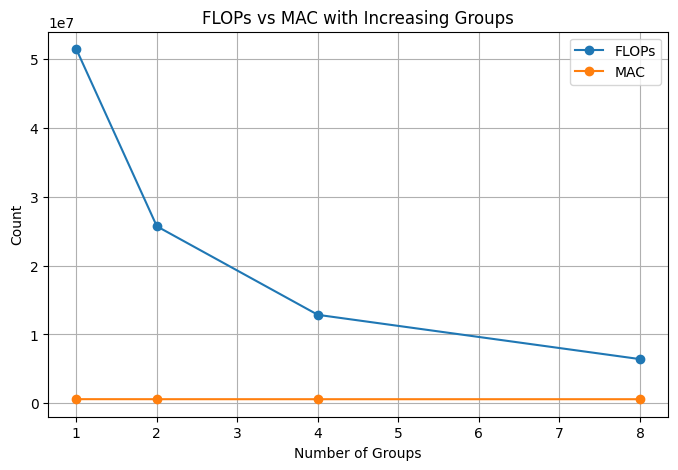

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mac(h, w, c1, c2, g=1):
    return h * w * (c1 + c2) + (c1 * c2) // g

def calculate_flops(h, w, c1, c2, g=1):
    return 2 * h * w * (c1 * c2) // g

# Feature map size
h, w = 56, 56  # Example feature map size

# Channel configurations for testing
groups = [1, 2, 4, 8]
c1, c2 = 64, 128  # Fixed channels for comparison

flops_values = []
mac_values = []

print(f"{'Groups':<8}{'FLOPs':<12}{'MAC':<12}")
print('-' * 30)

for g in groups:
    flops = calculate_flops(h, w, c1, c2, g)
    mac = calculate_mac(h, w, c1, c2, g)
    flops_values.append(flops)
    mac_values.append(mac)
    print(f"{g:<8}{flops:<12}{mac:<12}")

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(groups, flops_values, label='FLOPs', marker='o')
plt.plot(groups, mac_values, label='MAC', marker='o')
plt.title('FLOPs vs MAC with Increasing Groups')
plt.xlabel('Number of Groups')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import h5py

# Path to your .h5 file
file_path = "/kaggle/working/KMUdata/mtcnnkmuneww.h5"  # Change this to your actual file path

# Open the .h5 file
with h5py.File(file_path, "r") as h5_file:
    print("Keys in the HDF5 file:")
    print(list(h5_file.keys()))  # Lists datasets and groups

    # Iterate through datasets
    for key in h5_file.keys():
        print(f"\nDataset: {key}")
        data = h5_file[key]
        print(f"Shape: {data.shape}, Data Type: {data.dtype}")

        # If the dataset is small, print some values
        if data.size < 100:  # Adjust as needed
            print("Values:", data[:])


Keys in the HDF5 file:
['data_label', 'data_pixel']

Dataset: data_label
Shape: (949,), Data Type: int64

Dataset: data_pixel
Shape: (949, 112, 112), Data Type: uint8


First 5 labels: [0 0 0 0 0]


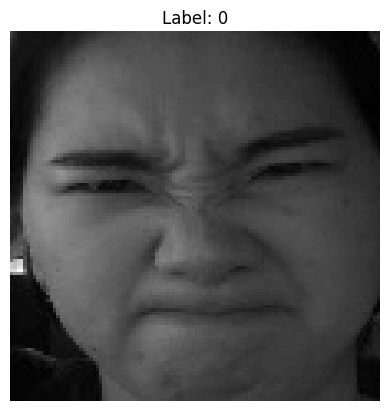

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load the .h5 file
file_path = "/kaggle/working/KMUdata/mtcnnkmuneww.h5"
with h5py.File(file_path, "r") as f:
    # Extract labels and images
    labels = f["data_label"][:]  # Load all labels
    images = f["data_pixel"][:]  # Load all images

    # Print first 5 labels
    print("First 5 labels:", labels[:5])

    # Display the first image
    plt.imshow(images[0], cmap="gray")
    plt.title(f"Label: {labels[1]}")
    plt.axis("off")
    plt.show()


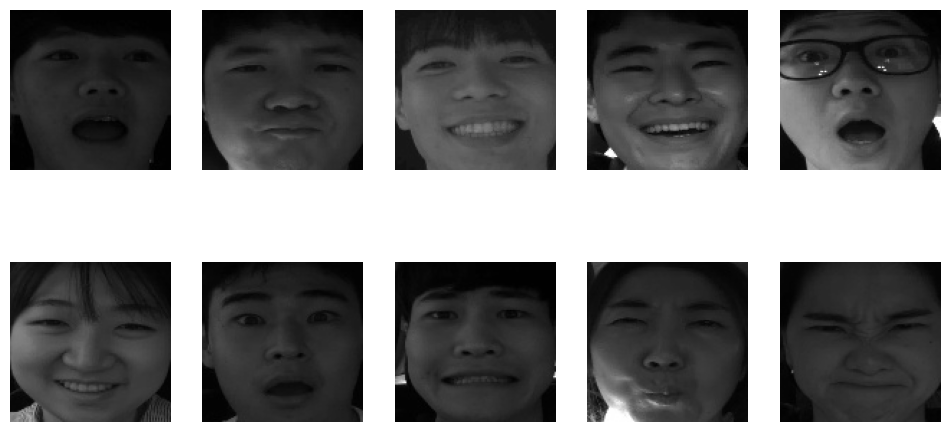

In [4]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert from tensor to numpy and rearrange dimensions
    img = np.clip(img, 0, 1)  # Ensure values are in valid range
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Define transformations (resize, normalize, and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((112, 112)),  # Resize to match LightCNN input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset (replace 'dataset_root' with actual path)
dataset_root = "/kaggle/input/driver2x/nic"
dataset = ImageFolder(root=dataset_root, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Get a batch of images
images, labels = next(iter(dataloader))

# Display 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = images[i].numpy().transpose((1, 2, 0))
    img = (img * 0.5) + 0.5  # Undo normalization
    ax.imshow(img)
    ax.axis("off")
plt.show()


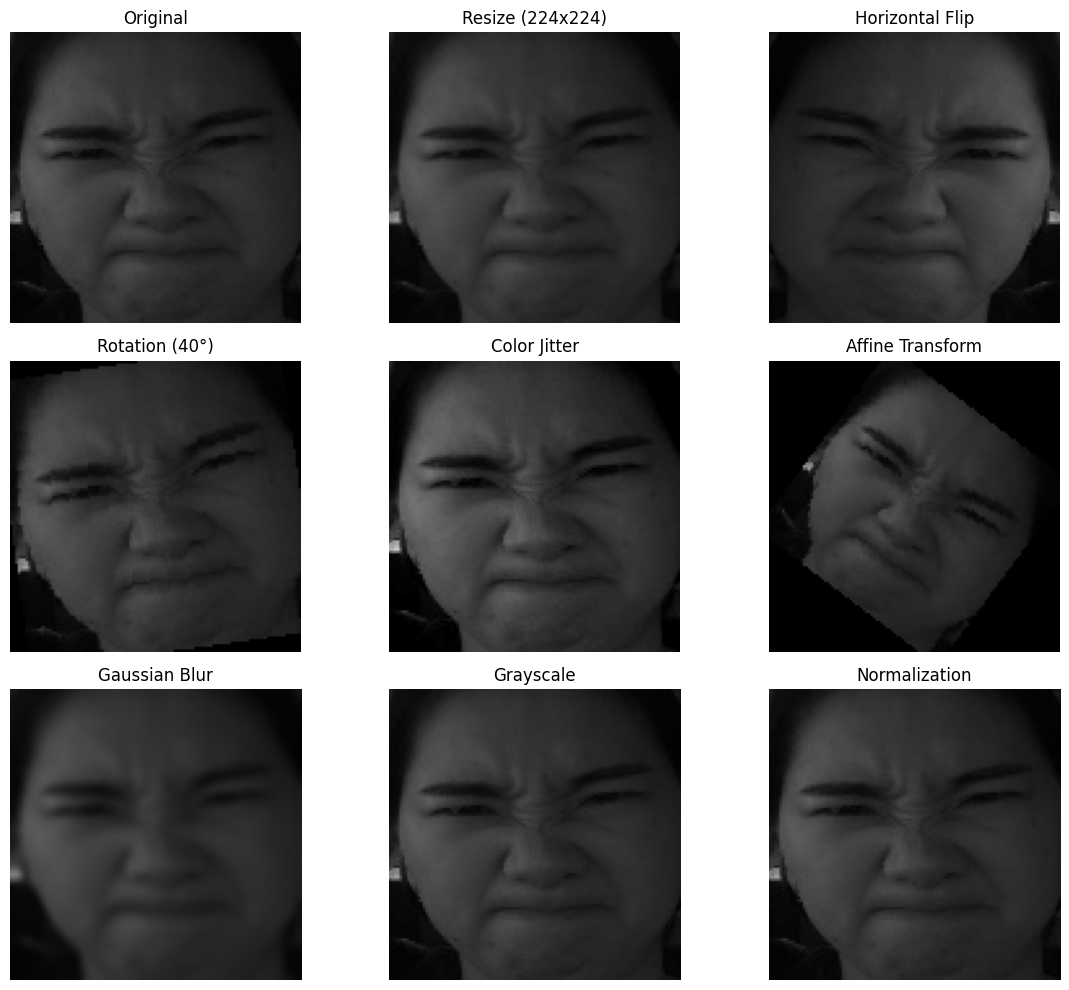

In [5]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.datasets import ImageFolder

# Load dataset (without transforms, so we can apply them manually)
dataset = ImageFolder(root='/kaggle/input/driver2x/nic')

# Get one sample image (first image in the dataset)
sample_image_path, _ = dataset.samples[0]  # Path to first image
sample_image = Image.open(sample_image_path).convert("RGB")  # Open image & ensure RGB mode

# Define individual transformations
transformations = {
    "Original": transforms.Compose([]),
    "Resize (224x224)": transforms.Resize((224, 224)),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1),  # Always flip
    "Rotation (40°)": transforms.RandomRotation(40),
    "Color Jitter": transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    "Affine Transform": transforms.RandomAffine(degrees=40, scale=(0.3, 1.1), shear=0.15),
    "Gaussian Blur": transforms.GaussianBlur(kernel_size=5),
    "Grayscale": transforms.Grayscale(num_output_channels=3),
    "Normalization": transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
}

# Apply each transformation
transformed_images = {}
for name, transform in transformations.items():
    if name == "Original":
        transformed_images[name] = sample_image
    elif name == "Normalization":
        img = transform(sample_image).numpy().transpose((1, 2, 0))  # Convert tensor to numpy
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean  # De-normalize
        img = np.clip(img, 0, 1)  # Clip values
        transformed_images[name] = img
    else:
        transformed_images[name] = transform(sample_image)

# Display images
fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3x3 grid
for ax, (name, img) in zip(axes.flat, transformed_images.items()):
    if isinstance(img, torch.Tensor):  # If tensor, convert to numpy
        img = img.numpy().transpose((1, 2, 0))
    ax.imshow(img)
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()


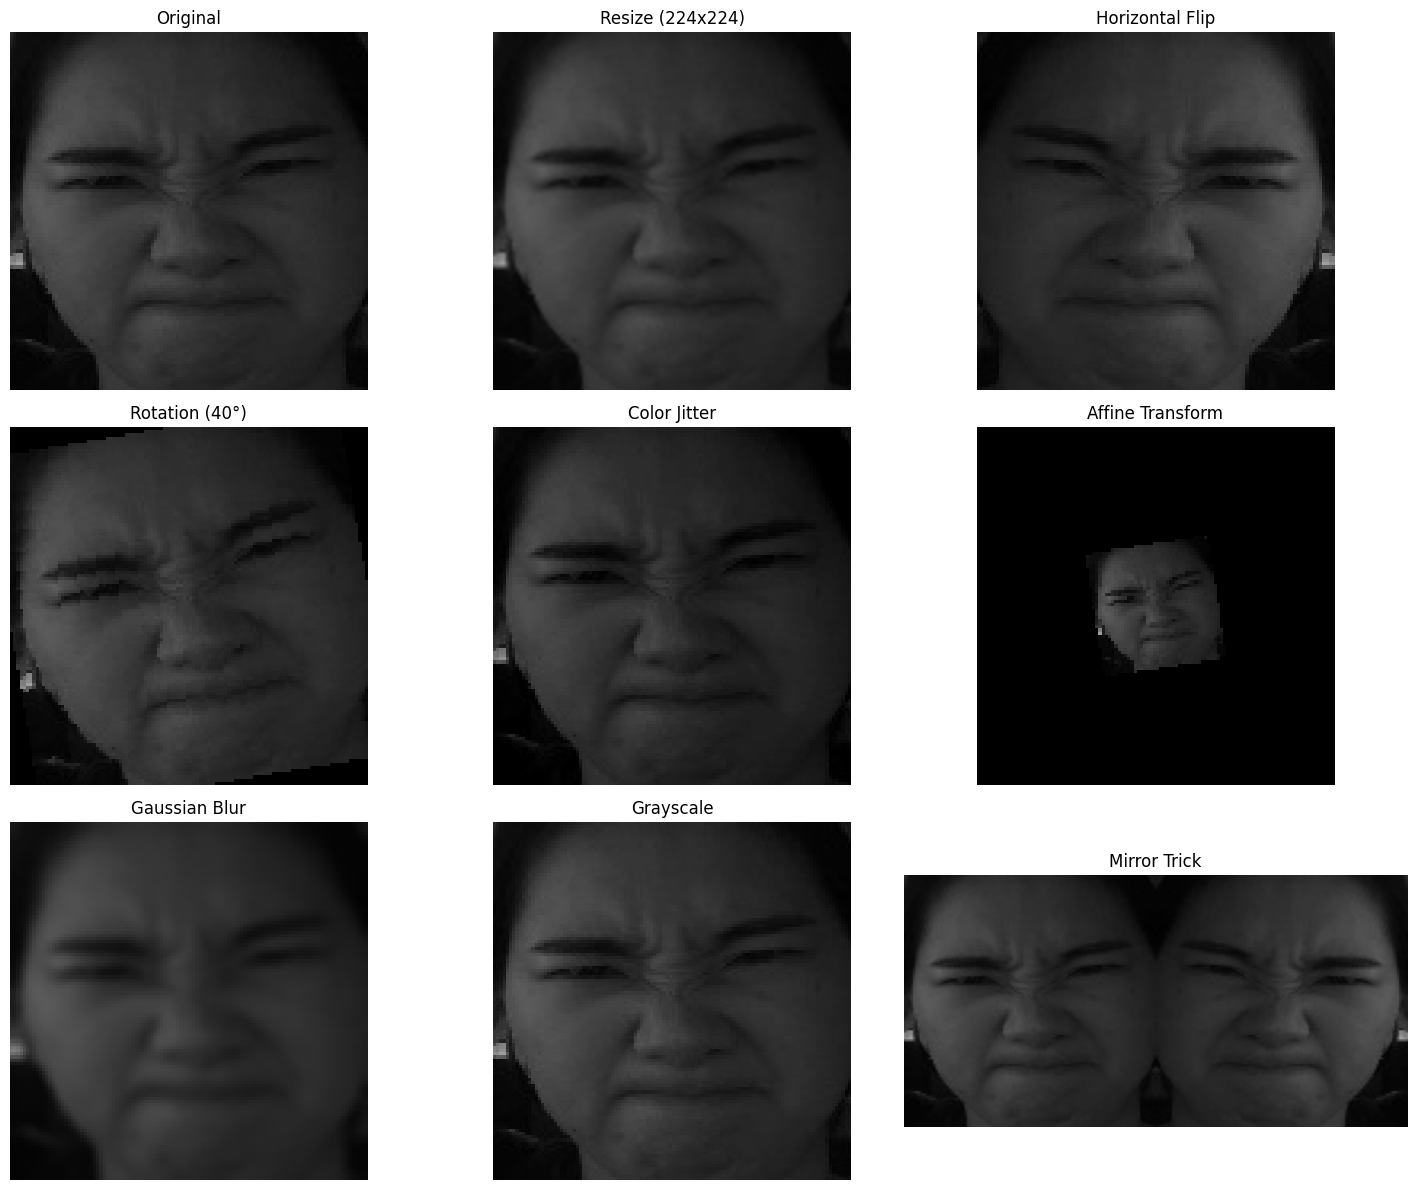

In [6]:
import torch
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from torchvision.datasets import ImageFolder

# Load dataset (without transforms, so we can apply them manually)
dataset = ImageFolder(root='/kaggle/input/driver2x/nic')

# Get one sample image (first image in the dataset)
sample_image_path, _ = dataset.samples[0]  # Path to first image
sample_image = Image.open(sample_image_path).convert("RGB")  # Ensure RGB mode

# Define individual transformations
transformations = {
    "Original": lambda img: img,
    "Resize (224x224)": transforms.Resize((224, 224)),
    "Horizontal Flip": lambda img: ImageOps.mirror(img),  # Ensure correct horizontal flip
    "Rotation (40°)": transforms.RandomRotation(40),
    "Color Jitter": transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    "Affine Transform": transforms.RandomAffine(degrees=40, scale=(0.3, 1.1), shear=0.15),
    "Gaussian Blur": transforms.GaussianBlur(kernel_size=5),
    "Grayscale": transforms.Grayscale(num_output_channels=3),
}

# Function to apply mirror trick (concatenates original and flipped)
def mirror_trick(image):
    flipped = ImageOps.mirror(image)  # Horizontally flip the image
    mirrored = Image.new("RGB", (image.width * 2, image.height))  # Create a new blank canvas (twice the width)
    mirrored.paste(image, (0, 0))  # Paste original on the left
    mirrored.paste(flipped, (image.width, 0))  # Paste flipped on the right
    return mirrored

# Apply each transformation
transformed_images = {}
for name, transform in transformations.items():
    transformed_images[name] = transform(sample_image) if callable(transform) else transform(sample_image)

# Apply mirror trick separately
transformed_images["Mirror Trick"] = mirror_trick(sample_image)

# Display images
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid
for ax, (name, img) in zip(axes.flat, transformed_images.items()):
    ax.imshow(img if isinstance(img, Image.Image) else np.array(img))  # Convert PIL images properly
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [7]:
from __future__ import print_function
from PIL import Image
import numpy as np
import h5py
import torch.utils.data as data


class KMU(data.Dataset):
 
    def __init__(self, split='Training', fold = 10, transform=None):
        self.transform = transform
        self.split = split  # training set or test set
        self.fold = fold # the k-fold cross validation
        self.data = h5py.File('/kaggle/working/KMUdata/mtcnnkmuneww.h5', 'r', driver='core')

        number = len(self.data['data_label']) #981
        ## with delete additinal images
        sum_number = [0,196,316,516,725,905,1104] # the sum of class number
        test_number = [19,12,20,21,18,20]
    
        
        test_index = []
        train_index = []

        for j in range(len(test_number)):
            for k in range(test_number[j]):
                if self.fold != 10: #the last fold start from the last element
                    test_index.append(sum_number[j]+(self.fold-1)*test_number[j]+k)
                else:
                    test_index.append(sum_number[j+1]-1-k)

        for i in range(number):
            if i not in test_index:
                train_index.append(i)

        print(len(train_index),len(test_index))
        print(f"Fold {self.fold}: Train samples: {len(train_index)}, Test samples: {len(test_index)}")

        # now load the picked numpy arrays
        if self.split == 'Training':
            self.train_data = []
            self.train_labels = []
            for ind in range(len(train_index)):
                self.train_data.append(self.data['data_pixel'][train_index[ind]])
                self.train_labels.append(self.data['data_label'][train_index[ind]])

        elif self.split == 'Testing':
            self.test_data = []
            self.test_labels = []
            for ind in range(len(test_index)):
                self.test_data.append(self.data['data_pixel'][test_index[ind]])
                self.test_labels.append(self.data['data_label'][test_index[ind]])
    
    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        if self.split == 'Training':
            img, target = self.train_data[index], self.train_labels[index]
        elif self.split == 'Testing':
            img, target = self.test_data[index], self.test_labels[index]
        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        

        if self.transform is not None:
            img = self.transform(img)
        return img, target
    
    def __len__(self):
        if self.split == 'Training':
            return len(self.train_data)
        elif self.split == 'Testing':
            return len(self.test_data)


In [8]:
'''
Build the EfficientViT model family
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
from timm.models.registry import register_model

EfficientViT_m0 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [64, 128, 192],
        'depth': [1, 2, 3],
        'num_heads': [4, 4, 4],
        'window_size': [7, 7, 7],
        'kernels': [5, 5, 5, 5],
    }

EfficientViT_m1 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [128, 144, 192],
        'depth': [1, 2, 3],
        'num_heads': [2, 3, 3],
        'window_size': [7, 7, 7],
        'kernels': [7, 5, 3, 3],
    }

EfficientViT_m2 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [128, 192, 224],
        'depth': [1, 2, 3],
        'num_heads': [4, 3, 2],
        'window_size': [7, 7, 7],
        'kernels': [7, 5, 3, 3],
    }

EfficientViT_m3 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [128, 240, 320],
        'depth': [1, 2, 3],
        'num_heads': [4, 3, 4],
        'window_size': [7, 7, 7],
        'kernels': [5, 5, 5, 5],
    }

EfficientViT_m4 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [128, 256, 384],
        'depth': [1, 2, 3],
        'num_heads': [4, 4, 4],
        'window_size': [7, 7, 7],
        'kernels': [7, 5, 3, 3],
    }

EfficientViT_m5 = {
        'img_size': 224,
        'patch_size': 16,
        'embed_dim': [192, 288, 384],
        'depth': [1, 3, 4],
        'num_heads': [3, 3, 4],
        'window_size': [7, 7, 7],
        'kernels': [7, 5, 3, 3],
    }


@register_model
def EfficientViT_M0(num_classes=1000, pretrained=False, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m0):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

@register_model
def EfficientViT_M1(num_classes=1000, pretrained=False, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m1):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

@register_model
def EfficientViT_M2(num_classes=1000, pretrained=False, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m2):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

@register_model
def EfficientViT_M3(num_classes=1000, pretrained=False, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m3):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

@register_model
def EfficientViT_M4(num_classes=1000, pretrained=True, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m4):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

@register_model
def EfficientViT_M5(num_classes=1000, pretrained=False, distillation=False, fuse=False, pretrained_cfg=None, model_cfg=EfficientViT_m5):
    model = EfficientViT(num_classes=num_classes, distillation=distillation, **model_cfg)
    if pretrained:
        pretrained = _checkpoint_url_format.format(pretrained)
        checkpoint = torch.hub.load_state_dict_from_url(
            pretrained, map_location='cpu')
        d = checkpoint['model']
        D = model.state_dict()
        for k in d.keys():
            if D[k].shape != d[k].shape:
                d[k] = d[k][:, :, None, None]
        model.load_state_dict(d)
    if fuse:
        replace_batchnorm(model)
    return model

def replace_batchnorm(net):
    for child_name, child in net.named_children():
        if hasattr(child, 'fuse'):
            setattr(net, child_name, child.fuse())
        elif isinstance(child, torch.nn.BatchNorm2d):
            setattr(net, child_name, torch.nn.Identity())
        else:
            replace_batchnorm(child)

_checkpoint_url_format = \
    'https://github.com/xinyuliu-jeffrey/EfficientViT_Model_Zoo/releases/download/v1.0/efficientvit_m2.pth'

/usr/local/lib/python3.10/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [9]:
# --------------------------------------------------------
# EfficientViT Model Architecture
# Copyright (c) 2022 Microsoft
# Build the EfficientViT Model
# Written by: Xinyu Liu
# --------------------------------------------------------
import torch
import itertools

from timm.models.vision_transformer import trunc_normal_
from timm.models.layers import SqueezeExcite

#Conv2d_BN:Convolution + Batch Normalization
class Conv2d_BN(torch.nn.Sequential):
    def __init__(self, a, b, ks=1, stride=1, pad=0, dilation=1,
                 groups=1, bn_weight_init=1, resolution=-10000):
        super().__init__()
        self.add_module('c', torch.nn.Conv2d(
            a, b, ks, stride, pad, dilation, groups, bias=False))
        self.add_module('bn', torch.nn.BatchNorm2d(b))
        torch.nn.init.constant_(self.bn.weight, bn_weight_init)
        torch.nn.init.constant_(self.bn.bias, 0)
    
    @torch.no_grad()
    #THis part Include fuse to merge convolution and BN
    def fuse(self):
        c, bn = self._modules.values()
        w = bn.weight / (bn.running_var + bn.eps)**0.5
        w = c.weight * w[:, None, None, None]
        b = bn.bias - bn.running_mean * bn.weight / \
            (bn.running_var + bn.eps)**0.5
        m = torch.nn.Conv2d(w.size(1) * self.c.groups, w.size(
            0), w.shape[2:], stride=self.c.stride, padding=self.c.padding, dilation=self.c.dilation, groups=self.c.groups)
        m.weight.data.copy_(w)
        m.bias.data.copy_(b)
        return m


class BN_Linear(torch.nn.Sequential):
    def __init__(self, a, b, bias=True, std=0.02):
        super().__init__()
        self.add_module('bn', torch.nn.BatchNorm1d(a))
        self.add_module('l', torch.nn.Linear(a, b, bias=bias))
        trunc_normal_(self.l.weight, std=std)
        if bias:
            torch.nn.init.constant_(self.l.bias, 0)

    @torch.no_grad()
    def fuse(self):
        bn, l = self._modules.values()
        w = bn.weight / (bn.running_var + bn.eps)**0.5
        b = bn.bias - self.bn.running_mean * \
            self.bn.weight / (bn.running_var + bn.eps)**0.5
        w = l.weight * w[None, :]
        if l.bias is None:
            b = b @ self.l.weight.T
        else:
            b = (l.weight @ b[:, None]).view(-1) + self.l.bias
        m = torch.nn.Linear(w.size(1), w.size(0))
        m.weight.data.copy_(w)
        m.bias.data.copy_(b)
        return m

#Patch merging: Downsampling layer
#It Uses convolution and squeeze-excitation to reduce spatial resolution and increase the feature channels
class PatchMerging(torch.nn.Module):
    def __init__(self, dim, out_dim, input_resolution):
        super().__init__()
        hid_dim = int(dim * 4)
        self.conv1 = Conv2d_BN(dim, hid_dim, 1, 1, 0, resolution=input_resolution)
        self.act = torch.nn.ReLU()
        self.conv2 = Conv2d_BN(hid_dim, hid_dim, 3, 2, 1, groups=hid_dim, resolution=input_resolution)
        self.se = SqueezeExcite(hid_dim, .25)
        self.conv3 = Conv2d_BN(hid_dim, out_dim, 1, 1, 0, resolution=input_resolution // 2)

    def forward(self, x):
        x = self.conv3(self.se(self.act(self.conv2(self.act(self.conv1(x))))))
        return x

#residual Connections :Supports stochastic depth
class Residual(torch.nn.Module):
    def __init__(self, m, drop=0.):
        super().__init__()
        self.m = m
        self.drop = drop

    def forward(self, x):
        if self.training and self.drop > 0:
            return x + self.m(x) * torch.rand(x.size(0), 1, 1, 1,
                                              device=x.device).ge_(self.drop).div(1 - self.drop).detach()
        else:
            return x + self.m(x)

#Feed forward network
class FFN(torch.nn.Module):
    def __init__(self, ed, h, resolution):
        super().__init__()
        self.pw1 = Conv2d_BN(ed, h, resolution=resolution)
        self.act = torch.nn.ReLU()
        self.pw2 = Conv2d_BN(h, ed, bn_weight_init=0, resolution=resolution)

    def forward(self, x):
        x = self.pw2(self.act(self.pw1(x)))
        return x

#Efficient Attention Mechanism 
class CascadedGroupAttention(torch.nn.Module):
    r""" Cascaded Group Attention.

    Args:
        dim (int): Number of input channels.
        key_dim (int): The dimension for query and key.
        num_heads (int): Number of attention heads.
        attn_ratio (int): Multiplier for the query dim for value dimension.
        resolution (int): Input resolution, correspond to the window size.
        kernels (List[int]): The kernel size of the dw conv on query.
    """
    def __init__(self, dim, key_dim, num_heads=8,
                 attn_ratio=4,
                 resolution=14,
                 kernels=[5, 5, 5, 5],):
        super().__init__()
        self.num_heads = num_heads
        self.scale = key_dim ** -0.5
        self.key_dim = key_dim
        self.d = int(attn_ratio * key_dim)
        self.attn_ratio = attn_ratio

        qkvs = []
        dws = []
        for i in range(num_heads):
            qkvs.append(Conv2d_BN(dim // (num_heads), self.key_dim * 2 + self.d, resolution=resolution))
            dws.append(Conv2d_BN(self.key_dim, self.key_dim, kernels[i], 1, kernels[i]//2, groups=self.key_dim, resolution=resolution))
        self.qkvs = torch.nn.ModuleList(qkvs)
        self.dws = torch.nn.ModuleList(dws)
        self.proj = torch.nn.Sequential(torch.nn.ReLU(), Conv2d_BN(
            self.d * num_heads, dim, bn_weight_init=0, resolution=resolution))

        points = list(itertools.product(range(resolution), range(resolution)))
        N = len(points)
        attention_offsets = {}
        idxs = []
        for p1 in points:
            for p2 in points:
                offset = (abs(p1[0] - p2[0]), abs(p1[1] - p2[1]))
                if offset not in attention_offsets:
                    attention_offsets[offset] = len(attention_offsets)
                idxs.append(attention_offsets[offset])
        self.attention_biases = torch.nn.Parameter(
            torch.zeros(num_heads, len(attention_offsets)))
        self.register_buffer('attention_bias_idxs',
                             torch.LongTensor(idxs).view(N, N))

    @torch.no_grad()
    def train(self, mode=True):
        super().train(mode)
        if mode and hasattr(self, 'ab'):
            del self.ab
        else:
            self.ab = self.attention_biases[:, self.attention_bias_idxs]

    def forward(self, x):  # x (B,C,H,W)
        B, C, H, W = x.shape
        trainingab = self.attention_biases[:, self.attention_bias_idxs]
        feats_in = x.chunk(len(self.qkvs), dim=1)
        feats_out = []
        feat = feats_in[0]
        for i, qkv in enumerate(self.qkvs):
            if i > 0: # add the previous output to the input
                feat = feat + feats_in[i]
            feat = qkv(feat)
            q, k, v = feat.view(B, -1, H, W).split([self.key_dim, self.key_dim, self.d], dim=1) # B, C/h, H, W
            q = self.dws[i](q)
            q, k, v = q.flatten(2), k.flatten(2), v.flatten(2) # B, C/h, N
            attn = (
                (q.transpose(-2, -1) @ k) * self.scale
                +
                (trainingab[i] if self.training else self.ab[i])
            )
            attn = attn.softmax(dim=-1) # BNN
            feat = (v @ attn.transpose(-2, -1)).view(B, self.d, H, W) # BCHW
            feats_out.append(feat)
        x = self.proj(torch.cat(feats_out, 1))
        return x

#Local Window Attention :divides input into samll window and applies self-attention within each
class LocalWindowAttention(torch.nn.Module):
    r""" Local Window Attention.

    Args:
        dim (int): Number of input channels.
        key_dim (int): The dimension for query and key.
        num_heads (int): Number of attention heads.
        attn_ratio (int): Multiplier for the query dim for value dimension.
        resolution (int): Input resolution.
        window_resolution (int): Local window resolution.
        kernels (List[int]): The kernel size of the dw conv on query.
    """
    def __init__(self, dim, key_dim, num_heads=8,
                 attn_ratio=4,
                 resolution=14,
                 window_resolution=7,
                 kernels=[5, 5, 5, 5],):
        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.resolution = resolution
        assert window_resolution > 0, 'window_size must be greater than 0'
        self.window_resolution = window_resolution
        
        window_resolution = min(window_resolution, resolution)
        self.attn = CascadedGroupAttention(dim, key_dim, num_heads,
                                attn_ratio=attn_ratio, 
                                resolution=window_resolution,
                                kernels=kernels,)

    def forward(self, x):
        H = W = self.resolution
        B, C, H_, W_ = x.shape
        # Only check this for classifcation models
        assert H == H_ and W == W_, 'input feature has wrong size, expect {}, got {}'.format((H, W), (H_, W_))
               
        if H <= self.window_resolution and W <= self.window_resolution:
            x = self.attn(x)
        else:
            x = x.permute(0, 2, 3, 1)
            pad_b = (self.window_resolution - H %
                     self.window_resolution) % self.window_resolution
            pad_r = (self.window_resolution - W %
                     self.window_resolution) % self.window_resolution
            padding = pad_b > 0 or pad_r > 0

            if padding:
                x = torch.nn.functional.pad(x, (0, 0, 0, pad_r, 0, pad_b))

            pH, pW = H + pad_b, W + pad_r
            nH = pH // self.window_resolution
            nW = pW // self.window_resolution
            # window partition, BHWC -> B(nHh)(nWw)C -> BnHnWhwC -> (BnHnW)hwC -> (BnHnW)Chw
            x = x.view(B, nH, self.window_resolution, nW, self.window_resolution, C).transpose(2, 3).reshape(
                B * nH * nW, self.window_resolution, self.window_resolution, C
            ).permute(0, 3, 1, 2)
            x = self.attn(x)
            # window reverse, (BnHnW)Chw -> (BnHnW)hwC -> BnHnWhwC -> B(nHh)(nWw)C -> BHWC
            x = x.permute(0, 2, 3, 1).view(B, nH, nW, self.window_resolution, self.window_resolution,
                       C).transpose(2, 3).reshape(B, pH, pW, C)
            if padding:
                x = x[:, :H, :W].contiguous()
            x = x.permute(0, 3, 1, 2)
        return x

#this is the block
class EfficientViTBlock(torch.nn.Module):    
    """ A basic EfficientViT building block.

    Args:
        type (str): Type for token mixer. Default: 's' for self-attention.
        ed (int): Number of input channels.
        kd (int): Dimension for query and key in the token mixer.
        nh (int): Number of attention heads.
        ar (int): Multiplier for the query dim for value dimension.
        resolution (int): Input resolution.
        window_resolution (int): Local window resolution.
        kernels (List[int]): The kernel size of the dw conv on query.
    """
    def __init__(self, type,
                 ed, kd, nh=8,
                 ar=4,
                 resolution=14,
                 window_resolution=7,
                 kernels=[5, 5, 5, 5],):
        super().__init__()
            
        self.dw0 = Residual(Conv2d_BN(ed, ed, 3, 1, 1, groups=ed, bn_weight_init=0., resolution=resolution))
        self.ffn0 = Residual(FFN(ed, int(ed * 2), resolution))

        if type == 's':
            self.mixer = Residual(LocalWindowAttention(ed, kd, nh, attn_ratio=ar, \
                    resolution=resolution, window_resolution=window_resolution, kernels=kernels))
                
        self.dw1 = Residual(Conv2d_BN(ed, ed, 3, 1, 1, groups=ed, bn_weight_init=0., resolution=resolution))
        self.ffn1 = Residual(FFN(ed, int(ed * 2), resolution))

    def forward(self, x):
        return self.ffn1(self.dw1(self.mixer(self.ffn0(self.dw0(x)))))


class EfficientViT(torch.nn.Module):
    def __init__(self, img_size=224,
                 patch_size=16,
                 in_chans=3,
                 num_classes=1000,
                 stages=['s', 's', 's'],
                 embed_dim=[64, 128, 192],
                 key_dim=[16, 16, 16],
                 depth=[1, 2, 3],
                 num_heads=[4, 4, 4],
                 window_size=[7, 7, 7],
                 kernels=[5, 5, 5, 5],
                 down_ops=[['subsample', 2], ['subsample', 2], ['']],
                 distillation=False,):
        super().__init__()

        resolution = img_size
        # Patch embedding
        self.patch_embed = torch.nn.Sequential(Conv2d_BN(in_chans, embed_dim[0] // 8, 3, 2, 1, resolution=resolution), torch.nn.ReLU(),
                           Conv2d_BN(embed_dim[0] // 8, embed_dim[0] // 4, 3, 2, 1, resolution=resolution // 2), torch.nn.ReLU(),
                           Conv2d_BN(embed_dim[0] // 4, embed_dim[0] // 2, 3, 2, 1, resolution=resolution // 4), torch.nn.ReLU(),
                           Conv2d_BN(embed_dim[0] // 2, embed_dim[0], 3, 2, 1, resolution=resolution // 8))

        resolution = img_size // patch_size
        attn_ratio = [embed_dim[i] / (key_dim[i] * num_heads[i]) for i in range(len(embed_dim))]
        self.blocks1 = []
        self.blocks2 = []
        self.blocks3 = []

        # Build EfficientViT blocks
        for i, (stg, ed, kd, dpth, nh, ar, wd, do) in enumerate(
                zip(stages, embed_dim, key_dim, depth, num_heads, attn_ratio, window_size, down_ops)):
            for d in range(dpth):
                eval('self.blocks' + str(i+1)).append(EfficientViTBlock(stg, ed, kd, nh, ar, resolution, wd, kernels))
            if do[0] == 'subsample':
                # Build EfficientViT downsample block
                #('Subsample' stride)
                blk = eval('self.blocks' + str(i+2))
                resolution_ = (resolution - 1) // do[1] + 1
                blk.append(torch.nn.Sequential(Residual(Conv2d_BN(embed_dim[i], embed_dim[i], 3, 1, 1, groups=embed_dim[i], resolution=resolution)),
                                    Residual(FFN(embed_dim[i], int(embed_dim[i] * 2), resolution)),))
                blk.append(PatchMerging(*embed_dim[i:i + 2], resolution))
                resolution = resolution_
                blk.append(torch.nn.Sequential(Residual(Conv2d_BN(embed_dim[i + 1], embed_dim[i + 1], 3, 1, 1, groups=embed_dim[i + 1], resolution=resolution)),
                                    Residual(FFN(embed_dim[i + 1], int(embed_dim[i + 1] * 2), resolution)),))
        self.blocks1 = torch.nn.Sequential(*self.blocks1)
        self.blocks2 = torch.nn.Sequential(*self.blocks2)
        self.blocks3 = torch.nn.Sequential(*self.blocks3)
        
        # Classification head
        self.head = BN_Linear(embed_dim[-1], num_classes) if num_classes > 0 else torch.nn.Identity()
        self.distillation = distillation
        if distillation:
            self.head_dist = BN_Linear(embed_dim[-1], num_classes) if num_classes > 0 else torch.nn.Identity()

    @torch.jit.ignore
    def no_weight_decay(self):
        return {x for x in self.state_dict().keys() if 'attention_biases' in x}

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.blocks1(x)
        x = self.blocks2(x)
        x = self.blocks3(x)
        x = torch.nn.functional.adaptive_avg_pool2d(x, 1).flatten(1)
        if self.distillation:
            x = self.head(x), self.head_dist(x)
            if not self.training:
                x = (x[0] + x[1]) / 2
        else:
            x = self.head(x)
        return x

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [10]:
import timm
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision import models
#from models.build import EfficientViT_M2

class CombinedModel(nn.Module):
    def __init__(self, num_classes):
        super(CombinedModel, self).__init__()

        # Feature extraction (ShuffleNet)
        self.feature_extractor_shufflenet = models.shufflenet_v2_x1_0(weights='ShuffleNet_V2_X1_0_Weights.DEFAULT')
        print(self.feature_extractor_shufflenet)
        num_features_shufflenet = self.feature_extractor_shufflenet.fc.in_features
        print(num_features_shufflenet)
        self.feature_extractor_shufflenet.fc = nn.Identity()
        #fully connected layer has been replaced with nn.Identity in shufflenet
        #TO only extracts features and do not perform classification
        shuff_params = sum(p.numel() for p in self.feature_extractor_shufflenet.parameters())

        # Feature extraction (EfficientViT_M2)
        
        self.feature_extractor_efficientvit = EfficientViT_M2(pretrained='efficientvit_m2')
        print(self.feature_extractor_efficientvit)
        num_features_efficientvit = self.feature_extractor_efficientvit.head.l.in_features
        self.feature_extractor_efficientvit.head.l = nn.Identity()
        #Head in cascaded self attention has been replaced with nn.Identity
        # TO extract features vectors instead of class scores
        #print(self.feature_extractor_efficientvit.head.l)
        efficientvit_params = sum(p.numel() for p in self.feature_extractor_efficientvit.parameters())
        # Combine features for classification
        combined_features_size = num_features_shufflenet + num_features_efficientvit
        print(combined_features_size)
      
        self.classifier = nn.Sequential(
            nn.Linear(combined_features_size, 512),  # Increase width
            nn.BatchNorm1d(512),  # Batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.5),  # First dropout layer
            nn.Linear(512, 256),  # Additional hidden layer
            nn.BatchNorm1d(256),  # Batch normalization
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Second dropout layer
            nn.Linear(256, num_classes)
        )
        
        classifier_params = sum(p.numel() for p in self.classifier.parameters())
        print("ShuffleNet Parameters:", shuff_params)
        print("EfficientViT Parameters:", efficientvit_params)
        print("Classifier Parameters:", classifier_params)

        total_params = shuff_params + efficientvit_params + classifier_params
        print("Total Parameters:", total_params)

    def forward(self, x):
        # Feature extraction with ShuffleNet
        features_shufflenet = self.feature_extractor_shufflenet(x)

        # Feature extraction with EfficientViT_M2
        features_efficientvit = self.feature_extractor_efficientvit(x)

        # Concatenate the features
        combined_features = torch.cat((features_shufflenet, features_efficientvit), dim=1)
        print(combined_features.shape)
        # Facial expression classification
        predictions = self.classifier(combined_features)
        print(predictions)

        return predictions

In [1]:
import torch
import torchvision.models as models

model = models.shufflenet_v2_x1_0(weights='ShuffleNet_V2_X1_0_Weights.DEFAULT')
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove last FC layer


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 114MB/s]


In [5]:
from torchsummary import summary
import torch
import torchvision.models as models

# Load ShuffleNet v2 (1.0x) with pre-trained weights
model = models.shufflenet_v2_x1_0(weights='ShuffleNet_V2_X1_0_Weights.DEFAULT')

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model summary
summary(model, (3, 224, 224))  # Input size: (channels, height, width)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 112, 112]             648
       BatchNorm2d-2         [-1, 24, 112, 112]              48
              ReLU-3         [-1, 24, 112, 112]               0
         MaxPool2d-4           [-1, 24, 56, 56]               0
            Conv2d-5           [-1, 24, 28, 28]             216
       BatchNorm2d-6           [-1, 24, 28, 28]              48
            Conv2d-7           [-1, 58, 28, 28]           1,392
       BatchNorm2d-8           [-1, 58, 28, 28]             116
              ReLU-9           [-1, 58, 28, 28]               0
           Conv2d-10           [-1, 58, 56, 56]           1,392
      BatchNorm2d-11           [-1, 58, 56, 56]             116
             ReLU-12           [-1, 58, 56, 56]               0
           Conv2d-13           [-1, 58, 28, 28]             522
      BatchNorm2d-14           [-1, 58,

In [11]:
'''Some helper functions for PyTorch, including:
    - progress_bar: progress bar mimic xlua.progress.
    - set_lr : set the learning rate
    - clip_gradient : clip gradient
'''

import os
import sys
import time
import math
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.autograd import Function
import cv2


term_width = 80

TOTAL_BAR_LENGTH = 30.
last_time = time.time()
begin_time = last_time

def progress_bar(current, total, msg=None):
    global last_time, begin_time
    if current == 0:
        begin_time = time.time()  # Reset for new bar.

    cur_len = int(TOTAL_BAR_LENGTH*current/total)
    rest_len = int(TOTAL_BAR_LENGTH - cur_len) - 1

    sys.stdout.write(' [')
    for i in range(cur_len):
        sys.stdout.write('=')
    sys.stdout.write('>')
    for i in range(rest_len):
        sys.stdout.write('.')
    sys.stdout.write(']')

    cur_time = time.time()
    step_time = cur_time - last_time
    last_time = cur_time
    tot_time = cur_time - begin_time

    L = []
    if msg:
        L.append(' | ' + msg)

    msg = ''.join(L)
    sys.stdout.write(msg)
    for i in range(term_width-int(TOTAL_BAR_LENGTH)-len(msg)-3):
        sys.stdout.write(' ')

    # Go back to the center of the bar.
    for i in range(term_width-int(TOTAL_BAR_LENGTH/2)+2):
        sys.stdout.write('\b')
    sys.stdout.write(' %d/%d ' % (current+1, total))

    if current < total-1:
        sys.stdout.write('\r')
    else:
        sys.stdout.write('\n')
    sys.stdout.flush()

def set_lr(optimizer, lr):
    for group in optimizer.param_groups:
        group['lr'] = lr

def clip_gradient(optimizer, grad_clip):
    for group in optimizer.param_groups:
        #print(group['params'])
        for param in group['params']:
            param.grad.data.clamp_(-grad_clip, grad_clip)

def resize_image(image, width=None, height=None, inter=cv2.INTER_AREA):
    # check if the width and height is specified
    if width is None and height is None:
        return image
 
    # initialize the dimension of the image and grab the
    # width and height of the image
    dimension = None
    (h, w) = image.shape[:2]
 
    # calculate the ratio of the height and
    # construct the new dimension
    if height is not None:
        ratio = height / float(h)
        dimension = (int(w * ratio), height)
    else:
        ratio = width / float(w)
        dimension = (width, int(h * ratio))
 
    # resize the image
    resized_image = cv2.resize(image, dimension, interpolation=inter)
 
    return resized_image

In [9]:
import os
for i in range(10):
     cmd = f'/kaggle/working/train.py--model Ourmodel --bs 128 --lr 0.001 --fold %d' %(i+1)
     os.system(cmd)
print("Train ShuffViT ok!")
os.system(cmd)


Train ShuffViT ok!


32512

In [7]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision.models import shufflenet_v2_x1_0

# Load ShuffleNetV2 model
model = shufflenet_v2_x1_0(pretrained=False)  # Set pretrained=True if you want pretrained weights

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Input size (batch_size, channels, height, width)
input_size = (3, 224, 224)

# Get model summary
summary(model, input_size)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 24, 112, 112]             648
       BatchNorm2d-2         [-1, 24, 112, 112]              48
              ReLU-3         [-1, 24, 112, 112]               0
         MaxPool2d-4           [-1, 24, 56, 56]               0
            Conv2d-5           [-1, 24, 28, 28]             216
       BatchNorm2d-6           [-1, 24, 28, 28]              48
            Conv2d-7           [-1, 58, 28, 28]           1,392
       BatchNorm2d-8           [-1, 58, 28, 28]             116
              ReLU-9           [-1, 58, 28, 28]               0
           Conv2d-10           [-1, 58, 56, 56]           1,392
      BatchNorm2d-11           [-1, 58, 56, 56]             116
             ReLU-12           [-1, 58, 56, 56]               0
           Conv2d-13           [-1, 58, 28, 28]             522
      BatchNorm2d-14           [-1, 58,

In [9]:
.from torchinfo import summary

# Define the model with the number of classes
num_classes = 6  # Change this based on your dataset
model = CombinedModel(num_classes=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
summary(model, input_size=(1,3, 224, 224))  # Batch size 1, 3 color channels, 224x224 resolution


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

Layer (type:depth-idx)                                            Output Shape              Param #
CombinedModel                                                     [1, 6]                    --
├─ShuffleNetV2: 1-1                                               [1, 1024]                 --
│    └─Sequential: 2-1                                            [1, 24, 112, 112]         --
│    │    └─Conv2d: 3-1                                           [1, 24, 112, 112]         648
│    │    └─BatchNorm2d: 3-2                                      [1, 24, 112, 112]         48
│    │    └─ReLU: 3-3                                             [1, 24, 112, 112]         --
│    └─MaxPool2d: 2-2                                             [1, 24, 56, 56]           --
│    └─Sequential: 2-3                                            [1, 116, 28, 28]          --
│    │    └─InvertedResidual: 3-4                                 [1, 116, 28, 28]          7,398
│    │    └─InvertedResidual: 3-5        

In [ ]:
# code where i am using this function with init fucntion


In [ ]:
#%%writefile /kaggle/working/train.py
from __future__ import print_function
import torch80
import csv
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import argparse
#import utils
import matplotlib.pyplot as plt
#from models import combmodel1
#from models.efficientvit import EfficientViT
#from KMU import KMU
from torch.autograd import Variable
import timm
import time
from torchvision import models
from torch.utils.data import DataLoader
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context


parser = argparse.ArgumentParser(description='PyTorch KMUFED ShuffViT-DFER Training')
parser.add_argument('--model', type=str, default='Ourmodel', help='CNN architecture')
parser.add_argument('--dataset', type=str, default='efficientvitwcc', help='dataset')
parser.add_argument('--fold', default=1, type=int, help='k fold number')
parser.add_argument('--bs', default=64, type=int, help='batch_size')
parser.add_argument('--lr', default=0.005, type=float, help='learning rate')
parser.add_argument('--resume', '-r', action='store_true', help='resume from checkpoint')
#opt = parser.parse_args()
opt, unknown = parser.parse_known_args()


use_cuda = torch.cuda.is_available()
device = "cuda:0" if torch.cuda.is_available() else "cpu"

best_Test_acc = 0  # best PrivateTest accuracy
best_Test_acc_epoch = 0
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

train_accuracy_values = []
test_accuracy_values = []
train_loss_values = []
test_loss_values = []

#cut_size = 60
total_epoch = 90

path = os.path.join(opt.dataset + '_' + opt.model, str(opt.fold))

# Data
print('==> Preparing data..')
print(use_cuda)
transforms_vaild = torchvision.transforms.Compose([
                                     torchvision.transforms.ToPILImage(),
                                     torchvision.transforms.Resize((224,)),
                                     torchvision.transforms.Grayscale(num_output_channels=3),
                                
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225,))
                             
                                     ])

# For training data , we add some augmentation
transforms_train = torchvision.transforms.Compose([
                                      torchvision.transforms.ToPILImage(),
                                      torchvision.transforms.Resize((224,)),            
                                      torchvision.transforms.RandomHorizontalFlip(),
                                      torchvision.transforms.RandomRotation(40),
                                      torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                                      torchvision.transforms.RandomAffine(degrees=40, scale=(.3, 1.1), shear=0.15),
                                      torchvision.transforms.GaussianBlur(kernel_size=5),
                                      torchvision.transforms.Grayscale(num_output_channels=3),
                                      torchvision.transforms.ToTensor(),
                                      torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225,))
                                     ])


trainset = KMU(split = 'Training', fold = opt.fold, transform=transforms_train)
trainloader = DataLoader(trainset, batch_size=opt.bs, shuffle=True, num_workers=0)
testset = KMU(split = 'Testing', fold = opt.fold, transform=transforms_vaild)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=0)
num_train_batches = len(trainloader)
num_test_batches = len(testloader)

print(f"Number of training batches per epoch: {num_train_batches}")
print(f"Number of testing batches per epoch: {num_test_batches}")

# Model
if opt.model == 'Ourmodel':
   num_classes = 6 
   net  = CombinedModel(num_classes) 

if opt.resume:
    # Load checkpoint.
    print('==> Resuming from checkpoint..')
    assert os.path.isdir(path), 'Error: no checkpoint directory found!'
    checkpoint = torch.load(os.path.join(path,'/kaggle/working/Test_model.t7'))
    
    net.load_state_dict(checkpoint['net'])
    best_Test_acc = checkpoint['best_Test_acc']
    best_Test_acc_epoch = checkpoint['best_Test_acc_epoch']
    start_epoch = best_Test_acc_epoch + 1
else:
    print('==> Building model..')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=opt.lr)

####
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_hours = int(elapsed_time // 3600)
    elapsed_time = elapsed_time - elapsed_hours * 3600
    elapsed_mins = int(elapsed_time // 60)
    elapsed_secs = int(elapsed_time % 60)
    return elapsed_hours, elapsed_mins, elapsed_secs

# Training

total_processing_time_train = 0
total_processing_time_test = 0

def train(epoch):
    print('\nEpoch: %d' % epoch)
    global Train_acc
    global total_processing_time_train
    net.to(device)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    start_time = time.monotonic()
  
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        #if use_cuda:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        inputs, targets = Variable(inputs), Variable(targets)
        start_time = time.time() 
        outputs = net(inputs)
        end_time = time.time()  # Record the end time
        processing_time = end_time - start_time
        total_processing_time_train += processing_time
        loss = criterion(outputs, targets)
        loss.backward()
        #utils.clip_gradient(optimizer, 0.1)
        optimizer.step()
    
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum().item()
        
        progress_bar(batch_idx, len(trainloader), 'TrainLoss: %.3f | TrainAcc: %.3f%% (%d/%d)'
            % (train_loss/(batch_idx+1), 100.*correct/total, correct, total))
    Train_acc = 100.*correct/total
    train_accuracy_values.append(Train_acc)
    train_loss_values.append(train_loss / (batch_idx + 1))

def test(epoch):
    global Test_acc
    global best_Test_acc
    global best_Test_acc_epoch
    global total_processing_time_test
    net.to(device)
    net.eval()
    PrivateTest_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, targets) in enumerate(testloader):
      
        #if use_cuda:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable(inputs), Variable(targets)
        start_time = time.time()  # Record the start time
   # Process the image with your model
        outputs = net(inputs)
        end_time = time.time()  # Record the end time
        processing_time = end_time - start_time
        
        total_processing_time_test += processing_time   
    
        loss = criterion(outputs, targets)
        PrivateTest_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum().item()
        
        progress_bar(batch_idx, len(testloader), 'TestLoss: %.3f | TestAcc: %.3f%% (%d/%d)'
            % (PrivateTest_loss / (batch_idx + 1), 100. * correct / total, correct, total))
    # Save checkpoint.
    Test_acc = 100.*correct/total
    test_accuracy_values.append(Test_acc)
    test_loss_values.append(PrivateTest_loss / (batch_idx + 1))
    if Test_acc > best_Test_acc:
        print('Saving..')
        print("best_Test_acc: %0.3f" % Test_acc)
        state = {'net': net.state_dict() if use_cuda else net,
            'best_Test_acc': Test_acc,
            'best_Test_acc_epoch': epoch,
        }
        if not os.path.isdir(opt.dataset + '_' + opt.model):
            os.mkdir(opt.dataset + '_' + opt.model)
        if not os.path.isdir(path):
            os.mkdir(path)
        torch.save(state, os.path.join(path, '/kaggle/working/Test_model.t7'))
        best_Test_acc = Test_acc
        best_Test_acc_epoch = epoch
        
    num_training_samples = len(trainloader.dataset)
    num_testing_samples = len(testloader.dataset)
    print('Processing Time for test one image:', processing_time)
    average_processing_time_train = total_processing_time_train / num_training_samples
    average_processing_time_test = total_processing_time_test / num_testing_samples

# Print the results
    print(f'Average Processing Time for a Single Image (Training): {average_processing_time_train:.6f} seconds')
    print(f'Average Processing Time for a Single Image (Testing): {average_processing_time_test:.6f} seconds')        
total_start_time = time.monotonic()
for epoch in range(start_epoch, total_epoch):
    start_time = time.monotonic()
    train(epoch)
    test(epoch)
    end_time = time.monotonic()
    epoch_hours, epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_hours}h {epoch_mins}m {epoch_secs}s')
total_end_time = time.monotonic()

total_hours, total_mins, total_secs = epoch_time(total_start_time, total_end_time)
total_time_estimate_hours = total_hours + (total_mins / 60) + (total_secs / 3600)
print(f'Total Time: {total_hours}h {total_mins}m {total_secs}s | Estimated Total Time: {total_time_estimate_hours:.2f} hours')
    
print("best_Test_acc: %0.3f" % best_Test_acc)
print("best_Test_acc_epoch: %d" % best_Test_acc_epoch)
##################################################################


==> Preparing data..
False
839 110
Fold 1: Train samples: 839, Test samples: 110
839 110
Fold 1: Train samples: 839, Test samples: 110
Number of training batches per epoch: 14
Number of testing batches per epoch: 4


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 273MB/s]
Downloading: "https://github.com/xinyuliu-jeffrey/EfficientViT_Model_Zoo/releases/download/v1.0/efficientvit_m2.pth" to /root/.cache/torch/hub/checkpoints/efficientvit_m2.pth


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

100%|██████████| 16.4M/16.4M [00:00<00:00, 58.8MB/s]


EfficientViT(
  (patch_embed): Sequential(
    (0): Conv2d_BN(
      (c): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ReLU()
    (2): Conv2d_BN(
      (c): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ReLU()
    (4): Conv2d_BN(
      (c): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (5): ReLU()
    (6): Conv2d_BN(
      (c): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (blocks1): Sequential(
    (0): EfficientViTBlock(
      (dw0): Residual(


In [8]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks
        self.forward_hook = target_layer.register_forward_hook(self.save_activation)
        self.backward_hook = target_layer.register_full_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        """ Stores the activation maps (feature maps) from the forward pass. """
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        """ Stores the gradients from the backward pass. """
        self.gradients = grad_output[0]  # Gradient of the activation

    def generate_heatmap(self, input_tensor, target_class=None):
        input_tensor = input_tensor.unsqueeze(0).to(device)
        output = self.model(input_tensor)

        # If no target class is provided, pick the predicted class
        if target_class is None:
            target_class = output.argmax().item()

        # Compute gradients for the target class
        self.model.zero_grad()
        output[:, target_class].backward()

        # Get activations and gradients
        activations = self.activations
        gradients = self.gradients

        # Compute global average pooling on gradients
        alpha = gradients.mean(dim=(2, 3), keepdim=True)

        # Weighted sum of activations
        cam = (alpha * activations).sum(dim=1).squeeze()
        cam = torch.relu(cam).detach().cpu().numpy()

        # Normalize and resize
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-10)
        cam = cv2.resize(cam, (224, 224))

# Convert heatmap to color
        heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

        return cam


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
num_classes = 7  # Adjust based on your dataset
model = CombinedModel(num_classes).to(device)
model.eval()

# Select the correct convolutional layer for Grad-CAM
target_layer = model.feature_extractor_shufflenet.stage4[-1]  # Last conv layer of ShuffleNet

# Initialize Grad-CAM
gradcam = GradCAM(model, target_layer)


1024
ShuffleNet Parameters: 1253604
EfficientViT Parameters: 3962554
Classifier Parameters: 774151
Total Parameters: 5990309


In [10]:
image_path = "/kaggle/input/driver2x/nic/SU/03_SU_s02_058.jpg"
image = Image.open(image_path).convert("RGB")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Preprocess image
input_tensor = transform(image).to(device)


torch.Size([1, 1248])


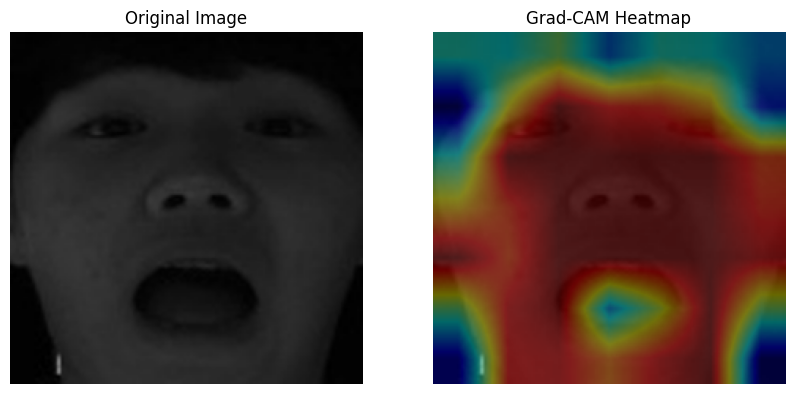

In [ ]:
# Generate Grad-CAM heatmap
heatmap = gradcam.generate_heatmap(input_tensor)

# Convert heatmap to color
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Convert original image to NumPy
original = np.array(image.resize((224, 224)))

# Overlay heatmap on original image
overlay = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

# Display results
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")

# Show Grad-CAM overlay
plt.subplot(1, 2, 2)
plt.imshow(overlay)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.show()


In [12]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import argparse
import itertools
import os
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import timm


parser = argparse.ArgumentParser(description='PyTorch KMUFED shuffvit-DFER Training')
parser.add_argument('--dataset', type=str, default='/kaggle/working/shufflnetw1', help='CNN architecture')
parser.add_argument('--model', type=str, default='/kaggle/working/efficientvitwcc_Ourmodel', help='CNN architecture')


opt, unknown = parser.parse_known_args()

device = "cuda:0" if torch.cuda.is_available() else "cpu"


transforms_vaild = torchvision.transforms.Compose([
                                     torchvision.transforms.ToPILImage(),
                                     torchvision.transforms.Resize((224,)),
                                     torchvision.transforms.Grayscale(num_output_channels=3),
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225,))
                                     ])


def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion 
    Normalization can be applied by setting `normalize=True
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.tight_layout()

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']


if opt.model == 'efficientViT':
    #pretrained model
    net = EfficientViT_M2(pretrained='efficientvit_m2') 
    num_features = net.head.l.in_features
    net.head.l = nn.Linear(num_features, 6)
if opt.model == 'Ourmodel':
   num_classes = 6  # Adjust based on your task
  
   net =  shufflenetw.CombinedModel(num_classes)
  

correct = 0
total = 0
all_target = []

for i in range(1):
    print("%d fold" % (i+1))
    path = os.path.join(opt.dataset + '_' + opt.model,  '%d' %(i+1))
    checkpoint = torch.load(os.path.join(path, '/kaggle/working/Test_model.t7'))

    net.load_state_dict(checkpoint['net'])
    #net.cuda()
    net.to(device)
    net.eval()
    testset = KMU(split = 'Testing', fold = i+1, transform=transforms_vaild)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

    for batch_idx, (inputs, targets) in enumerate(testloader):
       
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        
        outputs = net(inputs)
        #outputs = net(inputs.to('cuda:1'))
         # avg over crops
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()

        if batch_idx == 0 and i == 0:
            all_predicted = predicted
            all_targets = targets
        else:
            all_predicted = torch.cat((all_predicted, predicted), 0)
            all_targets = torch.cat((all_targets, targets), 0)

acc = 100. * correct / total
print("accuracy: %0.3f" % acc)

# Compute confusion matrix
matrix = confusion_matrix(all_targets.data.cpu().numpy(), all_predicted.cpu().numpy())
np.set_printoptions(precision=2)


print('Classification Report:\n', classification_report(all_targets.data.cpu().numpy(), all_predicted.cpu().numpy(), target_names=class_names))

 
plt.figure(figsize=(10, 8))
plot_confusion_matrix(matrix, classes=class_names, normalize=True,
                      title= 'Confusion Matrix (Accuracy: %0.3f%%)' %acc)
#plt.show()
plt.savefig(os.path.join(opt.dataset + '_' + opt.model, '/kaggle/working/lightmtrcmobilevit.png'))
plt.close()

1 fold
839 110
Fold 1: Train samples: 839, Test samples: 110


<ipython-input-12-f299dc4beae9>:97: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(path, '/kaggle/working/Test_model.t7'))
<ipython-input

torch.Size([110, 1248])
accuracy: 92.727
Classification Report:
               precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        19
     Disgust       0.92      1.00      0.96        12
        Fear       0.94      0.80      0.86        20
       Happy       0.90      0.86      0.88        21
     Sadness       1.00      1.00      1.00        18
    Surprise       0.83      0.95      0.88        20

    accuracy                           0.93       110
   macro avg       0.93      0.93      0.93       110
weighted avg       0.93      0.93      0.93       110

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.8  0.05 0.   0.15]
 [0.   0.05 0.05 0.86 0.   0.05]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.05 0.   0.95]]


In [13]:
# Load model safely
checkpoint = torch.load('/kaggle/working/Test_model.t7', map_location=device)

# Handle state_dict mismatch
model_dict = net.state_dict()
pretrained_dict = {k: v for k, v in checkpoint['net'].items() if k in model_dict}
model_dict.update(pretrained_dict)
net.load_state_dict(model_dict, strict=False)

# Move model to device
net.to(device)


<ipython-input-13-aaf8a34f6fb4>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/kaggle/working/Test_model.t7', map_location=device)


CombinedModel(
  (feature_extractor_shufflenet): ShuffleNetV2(
    (conv1): Sequential(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (stage2): Sequential(
      (0): InvertedResidual(
        (branch1): Sequential(
          (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
          (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (4): ReLU(inplace=True)
        )
        (branch2): Sequential(
          (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.transforms as transforms
import argparse
import itertools
import os
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
#from models.build import EfficientViT_M2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import timm
#from KMU import KMU
#from models import combmodel1
from torchvision import models
#from models import *

parser = argparse.ArgumentParser(description='PyTorch MKUFED shuffvit-DFER Training')
parser.add_argument('--dataset', type=str, default='/kaggle/working/shufflnetw1', help='CNN architecture')
parser.add_argument('--model', type=str, default='/kaggle/working/efficientViT', help='CNN architecture')

#opt = parser.parse_args()
#args, unknown = parser.parse_known_args()
opt, _ = parser.parse_known_args()


device = "cuda:0" if torch.cuda.is_available() else "cpu"
#cut_size = 44

transforms_vaild = torchvision.transforms.Compose([
                                     torchvision.transforms.ToPILImage(),
                                     torchvision.transforms.Resize((224,)),
                                     torchvision.transforms.Grayscale(num_output_channels=3),
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225,))
                                     ])


def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.tight_layout()

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']

# Model
if opt.model == 'efficientViT':
    #pretrained model
    net = EfficientViT_M4(pretrained='efficientvit_m4') 
    num_features = net.head.l.in_features
    net.head.l = nn.Linear(num_features, 6)
if opt.model == 'Ourmodel':
   num_classes = 6  # Adjust based on your task
   #net  = combmodel2.CombinedModel(num_classes) 
   net =  shufflenetw.CombinedModel(num_classes)
   #net = shufflenetwcc.CombinedModel(num_classes)
   #net = efficientvitw.CombinedModel(num_classes)
   #net = efficientvitwcc.CombinedModel(num_classes)



correct = 0
total = 0
all_target = []
total_folds=10
for i in range(2):
    print("%d fold" % (i+1))
    path = os.path.join(opt.dataset + '_' + opt.model,  '%d' %(i+1))
    checkpoint = torch.load('/kaggle/working/Test_model.t7', map_location=device)
    #net.load_state_dict(checkpoint['net'])
    net.cuda()
    # Handle state_dict mismatch
    model_dict = net.state_dict()
    pretrained_dict = {k: v for k, v in checkpoint['net'].items() if k in model_dict}
    model_dict.update(pretrained_dict)
    net.load_state_dict(model_dict, strict=False)

# Move model to device

    #net.to(device)
    net.eval()
    
    testset = KMU(split = 'Testing', fold=min(i+1, total_folds), transform=transforms_vaild)
    testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

    for batch_idx, (inputs, targets) in enumerate(testloader):
       
        inputs, targets = inputs.to(device), targets.to(device)
        inputs, targets = Variable(inputs, volatile=True), Variable(targets)
        
        outputs = net(inputs)
        #outputs = net(inputs.to('cuda:1'))
         # avg over crops
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()

        if batch_idx == 0 and i == 0:
            all_predicted = predicted
            all_targets = targets
        else:
            all_predicted = torch.cat((all_predicted, predicted), 0)
            all_targets = torch.cat((all_targets, targets), 0)

acc = 100. * correct / total
print("accuracy: %0.3f" % acc)

# Compute confusion matrix
matrix = confusion_matrix(all_targets.data.cpu().numpy(), all_predicted.cpu().numpy())
np.set_printoptions(precision=2)

# Print classification report

print('Classification Report:\n', classification_report(all_targets.data.cpu().numpy(), all_predicted.cpu().numpy(), target_names=class_names))

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
plot_confusion_matrix(matrix, classes=class_names, normalize=True,
                      title= 'Confusion Matrix (Accuracy: %0.3f%%)' %acc)
#plt.show()
plt.savefig(os.path.join(opt.dataset + '_' + opt.model, '/kaggle/working/lightmtrcmobilevit.png'))
plt.close()

In [18]:
import torch

# Load the file
checkpoint = torch.load("/kaggle/working/Test_model.t7", map_location=torch.device("cpu"))

# Print keys to check what’s inside
print(checkpoint.keys() if isinstance(checkpoint, dict) else type(checkpoint))


dict_keys(['net', 'best_Test_acc', 'best_Test_acc_epoch'])


<ipython-input-18-8f30780452aa>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("/kaggle/working/Test_model.t7", map_location=torch.device("cpu"))


In [23]:
import torch

checkpoint = torch.load("/kaggle/working/Test_model.t7", map_location=torch.device("cpu"))

# Print the structure of the checkpoint
print(type(checkpoint))

# If it’s a dictionary, print its keys
if isinstance(checkpoint, dict):
    print("Checkpoint keys:", checkpoint.keys())


<class 'dict'>
Checkpoint keys: dict_keys(['net', 'best_Test_acc', 'best_Test_acc_epoch'])


<ipython-input-23-639458b52703>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("/kaggle/working/Test_model.t7", map_location=torch.device("cpu"))


In [58]:
print("Raw model output:", output)
print("Predicted class index:", predicted_class)


Raw model output: tensor([[ 4.1711e-05,  2.2953e-05,  6.3104e-06,  2.9000e-06,  2.2288e-05,
          1.1110e-05,  4.2139e-05, -2.8549e-05,  3.3271e-05, -1.5173e-05,
          7.4829e-06,  1.9451e-05,  2.5369e-05,  5.6029e-06,  6.3664e-06,
         -5.8367e-06, -3.8947e-05,  7.9544e-06,  4.0090e-05, -9.3319e-06,
         -5.0037e-06, -2.5625e-05, -1.5739e-05,  2.8585e-05,  8.1283e-08,
         -3.2709e-06, -1.7944e-05,  2.5286e-05, -1.0522e-05,  1.6029e-05,
         -1.7601e-06,  1.4978e-05,  1.7548e-05, -2.8959e-05, -1.3793e-05,
         -3.2874e-05, -1.1433e-05,  1.9278e-05,  1.8450e-05, -6.4939e-06,
          1.3998e-05,  4.7017e-05, -9.9037e-06,  8.8310e-06, -1.9943e-05,
          3.0982e-05,  1.7019e-05,  1.7774e-05,  2.3073e-05, -4.1707e-05,
         -1.8744e-05, -2.0133e-05, -2.7338e-06, -3.0028e-05, -5.7124e-06,
          7.3313e-06,  3.3424e-05, -2.3225e-05, -4.0564e-05,  6.2634e-06,
         -1.2551e-05,  4.2498e-05,  9.9143e-06, -1.2801e-05,  1.3503e-05,
          2.5239e-05

In [1]:
import timm

net = timm.create_model('efficientvit_m2', pretrained=False)
print(net)  # Prints the model architecture


EfficientVitMsra(
  (patch_embed): PatchEmbedding(
    (conv1): ConvNorm(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu1): ReLU()
    (conv2): ConvNorm(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu2): ReLU()
    (conv3): ConvNorm(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (relu3): ReLU()
    (conv4): ConvNorm(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (stages): Sequential(
    (0):